In [34]:
import pandas as pd
data = pd.read_csv('Data Files/CSV_files/omni_kp_combined.csv')

In [11]:
len(sorted(data.Kp_gfz.value_counts().index))

28

<AxesSubplot: ylabel='Kp_gfz'>

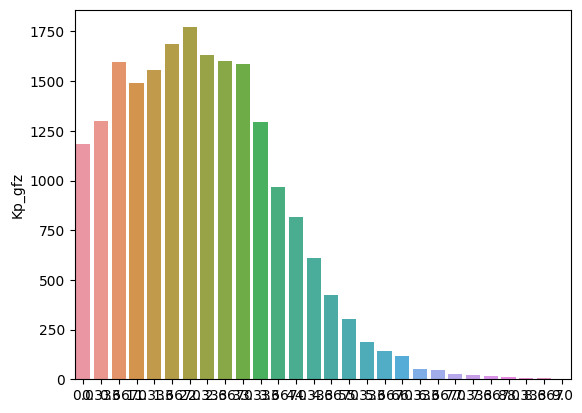

In [7]:
import seaborn as sns
sns.barplot(x = data.Kp_gfz.value_counts().index,y =  data.Kp_gfz.value_counts())

In [12]:
import numpy as np
pd.cut(data['Kp_gfz'], bins=np.arange(0, 10, 0.33), labels=np.arange(0, 9))

ValueError: Bin labels must be one fewer than the number of bin edges

In [ ]:
df = data

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Prepare the data
# Assuming your time series dataframe 'df' has a column 'Kp' with values in the range [0, 9]
# and 'Kp' is sorted based on the time index.

# Function to create sequences of length 'seq_length'
def create_sequences(data, seq_length=6):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

# Convert 'Kp' to categorical labels
df['Kp_gfz'] = pd.cut(df['Kp_gfz'], bins=np.arange(0, 10, 0.33), labels=np.arange(0, 9))

# Split data into features and target
X = df['Kp_gfz'].values
X = create_sequences(X)

# Use LabelEncoder for target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(X[:, -1])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(6, 1)))
model.add(Dense(9, activation='softmax'))

# Step 3: Train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 6, 1), y_train, epochs=50, batch_size=32, validation_split=0.1)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, 6, 1), y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Step 5: Plot the predictions
y_pred = model.predict(X_test.reshape(-1, 6, 1))
predicted_labels = np.argmax(y_pred, axis=1)
actual_labels = y_test

# Convert integer labels back to original Kp values
predicted_kp = label_encoder.inverse_transform(predicted_labels)
actual_kp = label_encoder.inverse_transform(actual_labels)

plt.figure(figsize=(12, 6))
plt.plot(predicted_kp, label='Predicted Kp')
plt.plot(actual_kp, label='Actual Kp')
plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Prepare the data
# Assuming your time series dataframe 'df' has a column 'Kp' with values in the range [0, 9]
# and 'Kp' is sorted based on the time index.

# Function to create sequences of length 'seq_length'
def create_sequences(data, seq_length=6):
    sequences = []
    for i in range(seq_length, len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)




# Split data into features and target
X = df['Kp_gfz'].values
X = create_sequences(X)

# Use LabelEncoder for target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(X[:, -1])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(6, 1)))
model.add(Dense(28, activation='softmax'))

# Step 3: Train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 6, 1), y_train, epochs=50, batch_size=32, validation_split=0.1)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, 6, 1), y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Step 5: Plot the predictions
y_pred = model.predict(X_test.reshape(-1, 6, 1))
predicted_labels = np.argmax(y_pred, axis=1)
actual_labels = y_test

# Convert integer labels back to original Kp values
predicted_kp = label_encoder.inverse_transform(predicted_labels)
actual_kp = label_encoder.inverse_transform(actual_labels)

plt.figure(figsize=(12, 6))
plt.plot(predicted_kp, label='Predicted Kp')
plt.plot(actual_kp, label='Actual Kp')
plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()
plt.show()


In [4]:
def create_sequences(data, seq_length=6):
    sequences = []
    for i in range(seq_length, len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

In [5]:
data = df

In [6]:
from sklearn.preprocessing import LabelEncoder
X = data['Kp_gfz'].values
X = create_sequences(X)

# Use LabelEncoder for target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(X[:, -1])

In [7]:
y

array([0, 0], dtype=int64)

In [23]:
X.shape, y.shape

((20452, 6), (20452,))

Epoch 1/50
461/461 [==============================] - 5s 6ms/step - loss: 2.3952 - accuracy: 0.1970 - val_loss: 1.9714 - val_accuracy: 0.3445
Epoch 2/50
461/461 [==============================] - 2s 5ms/step - loss: 1.7622 - accuracy: 0.4172 - val_loss: 1.5751 - val_accuracy: 0.5211
Epoch 3/50
461/461 [==============================] - 2s 5ms/step - loss: 1.4702 - accuracy: 0.5526 - val_loss: 1.3559 - val_accuracy: 0.5797
Epoch 4/50
461/461 [==============================] - 2s 5ms/step - loss: 1.2658 - accuracy: 0.6936 - val_loss: 1.1696 - val_accuracy: 0.8320
Epoch 5/50
461/461 [==============================] - 2s 5ms/step - loss: 1.1038 - accuracy: 0.7715 - val_loss: 1.0100 - val_accuracy: 0.8705
Epoch 6/50
461/461 [==============================] - 2s 5ms/step - loss: 0.9631 - accuracy: 0.8410 - val_loss: 0.8795 - val_accuracy: 0.8711
Epoch 7/50
461/461 [==============================] - 3s 6ms/step - loss: 0.8417 - accuracy: 0.8789 - val_loss: 0.7620 - val_accuracy: 0.9126
Epoch 

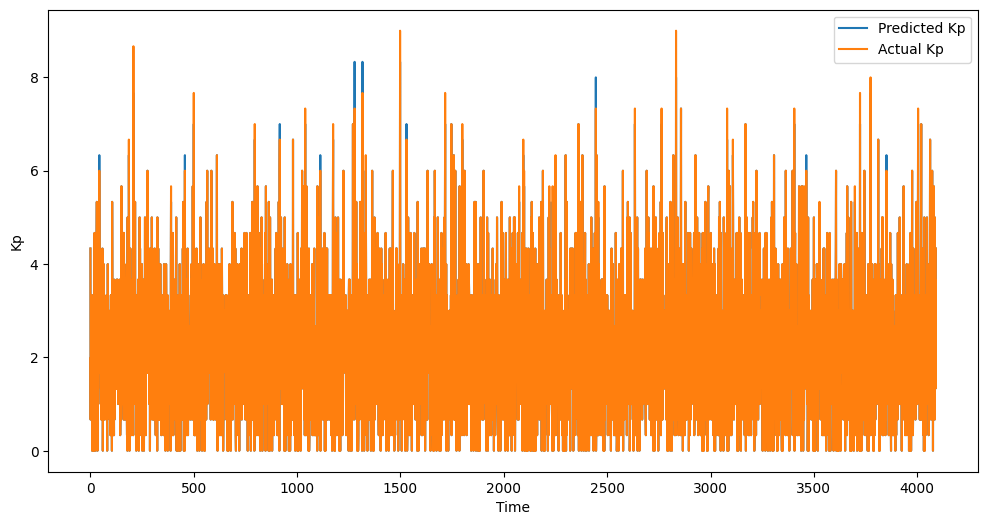

In [30]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(6, 1)))
model.add(Dense(28, activation='softmax'))

# Step 3: Train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 6, 1), y_train, epochs=50, batch_size=32, validation_split=0.1)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, 6, 1), y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Step 5: Plot the predictions
y_pred = model.predict(X_test.reshape(-1, 6, 1))
predicted_labels = np.argmax(y_pred, axis=1)
actual_labels = y_test

# Convert integer labels back to original Kp values
predicted_kp = label_encoder.inverse_transform(predicted_labels)
actual_kp = label_encoder.inverse_transform(actual_labels)

plt.figure(figsize=(12, 6))
plt.plot(predicted_kp, label='Predicted Kp')
plt.plot(actual_kp, label='Actual Kp')
plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()
plt.show()

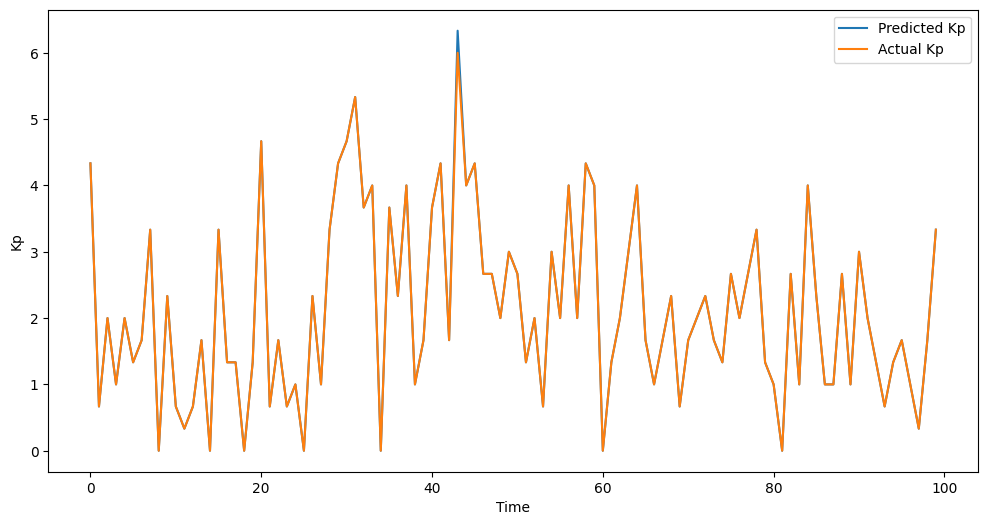

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(predicted_kp[:100], label='Predicted Kp')
plt.plot(actual_kp[:100], label='Actual Kp')
plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted_labels, actual_labels)

array([[243,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 317,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 308,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 314,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 345,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [36]:
confusion_table = pd.DataFrame(confusion_matrix(predicted_labels, actual_labels),
                               index=np.arange(28),
                               columns=np.arange(28))

print("Confusion Table:")
confusion_table


Confusion Table:


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,243,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,241,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,317,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,308,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,314,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,345,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,347,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,327,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,329,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,322,...,0,0,0,0,0,0,0,0,0,0


In [38]:
def create_sequences(data, seq_length=6, day_offset=0):
    sequences = []
    for i in range(seq_length, len(data) - seq_length - day_offset):
        sequence = data[i + day_offset:i + seq_length+day_offset]
        sequences.append(sequence)
    return np.array(sequences)

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = data['Kp_gfz'].values
X = create_sequences(X, day_offset=1)

# Use LabelEncoder for target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(X[:, -1])

In [97]:
X = data['Kp_gfz'].values

# data.Date = pd.to_datetime(data.Date)
# data.set_index('Date', inplace = True) 
data.Kp_gfz.isna().sum()
X = data.Kp_gfz.dropna()

y = X[7:]
X = create_sequences(X)

In [113]:
input = X[:-2]
target = X[1:-1, 0]

(array([[6.333, 2.333, 2.   , 3.333, 1.   , 1.   ],
        [2.333, 2.   , 3.333, 1.   , 1.   , 7.333],
        [2.   , 3.333, 1.   , 1.   , 7.333, 3.   ],
        ...,
        [4.667, 3.   , 2.333, 2.   , 1.333, 4.   ],
        [3.   , 2.333, 2.   , 1.333, 4.   , 0.333],
        [2.333, 2.   , 1.333, 4.   , 0.333, 1.   ]]),
 array([2.333, 2.   , 3.333, ..., 3.   , 2.333, 2.   ]))

In [108]:
input.shape, target.shape

((20448, 6), (20448,))

In [99]:
X.shape, y.shape

((20450, 6), (20455,))

In [58]:
X.shape, y.shape

((20450, 6), (20456,))

In [59]:
X

array([[6.333, 2.333, 2.   , 3.333, 1.   , 1.   ],
       [2.333, 2.   , 3.333, 1.   , 1.   , 7.333],
       [2.   , 3.333, 1.   , 1.   , 7.333, 3.   ],
       ...,
       [2.333, 2.   , 1.333, 4.   , 0.333, 1.   ],
       [2.   , 1.333, 4.   , 0.333, 1.   , 1.   ],
       [1.333, 4.   , 0.333, 1.   , 1.   , 2.   ]])

In [60]:
y = label_encoder.fit_transform()

In [64]:
y =  X[:, -1]
X = X[:, :-1]


In [66]:
y.shape, X.shape

((20450,), (20450, 5))

Epoch 1/50
461/461 [==============================] - 5s 7ms/step - loss: 2.3899 - accuracy: 0.1723 - val_loss: 1.6233 - val_accuracy: 0.4328
Epoch 2/50
461/461 [==============================] - 3s 6ms/step - loss: 0.9821 - accuracy: 0.7216 - val_loss: 0.5971 - val_accuracy: 0.8900
Epoch 3/50
461/461 [==============================] - 3s 6ms/step - loss: 0.3657 - accuracy: 0.9250 - val_loss: 0.2379 - val_accuracy: 0.9590
Epoch 4/50
461/461 [==============================] - 3s 6ms/step - loss: 0.1935 - accuracy: 0.9594 - val_loss: 0.1667 - val_accuracy: 0.9707
Epoch 5/50
461/461 [==============================] - 3s 6ms/step - loss: 0.1286 - accuracy: 0.9734 - val_loss: 0.1020 - val_accuracy: 0.9817
Epoch 6/50
461/461 [==============================] - 3s 6ms/step - loss: 0.3886 - accuracy: 0.9122 - val_loss: 0.1055 - val_accuracy: 0.9835
Epoch 7/50
461/461 [==============================] - 3s 6ms/step - loss: 0.0917 - accuracy: 0.9845 - val_loss: 0.0747 - val_accuracy: 0.9841
Epoch 

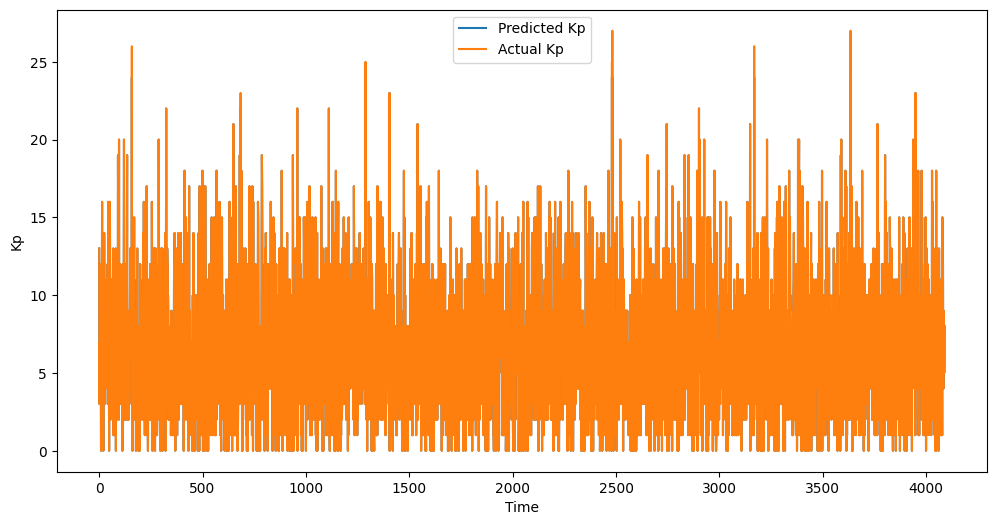

In [110]:
label_encoder = LabelEncoder()
target= label_encoder.fit_transform(target)


X_train, X_test, y_train, y_test = train_test_split(input,target, test_size=0.2, random_state=42)

# Step 2: Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(6, 1)))
model.add(Dense(28, activation='softmax'))

# Step 3: Train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 6, 1), y_train, epochs=50, batch_size=32, validation_split=0.1)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, 6, 1), y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Step 5: Plot the predictions
y_pred = model.predict(X_test.reshape(-1, 6, 1))
predicted_labels = np.argmax(y_pred, axis=1)
actual_labels = y_test

# Convert integer labels back to original Kp values
predicted_kp = label_encoder.inverse_transform(predicted_labels)
actual_kp = label_encoder.inverse_transform(actual_labels)

plt.figure(figsize=(12, 6))
plt.plot(predicted_kp, label='Predicted Kp')
plt.plot(actual_kp, label='Actual Kp')
plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()
plt.show()

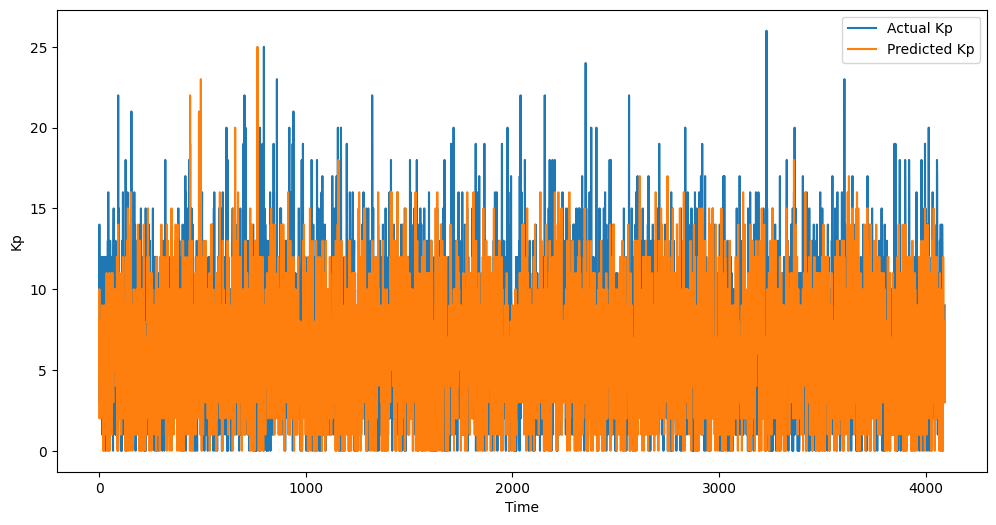

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(actual_kp, label='Actual Kp')
plt.plot(predicted_kp, label='Predicted Kp')

plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()
plt.show()

Epoch 1/50
921/921 [==============================] - 10s 8ms/step - loss: 2.7895 - accuracy: 0.0914 - val_loss: 2.7185 - val_accuracy: 0.1100
Epoch 2/50
921/921 [==============================] - 6s 7ms/step - loss: 2.7277 - accuracy: 0.1060 - val_loss: 2.7230 - val_accuracy: 0.1026
Epoch 3/50
921/921 [==============================] - 6s 7ms/step - loss: 2.7221 - accuracy: 0.1094 - val_loss: 2.7136 - val_accuracy: 0.1100
Epoch 4/50
921/921 [==============================] - 6s 7ms/step - loss: 2.7179 - accuracy: 0.1113 - val_loss: 2.7154 - val_accuracy: 0.1038
Epoch 5/50
921/921 [==============================] - 6s 7ms/step - loss: 2.7164 - accuracy: 0.1095 - val_loss: 2.7159 - val_accuracy: 0.1038
Epoch 6/50
921/921 [==============================] - 6s 7ms/step - loss: 2.7124 - accuracy: 0.1122 - val_loss: 2.7102 - val_accuracy: 0.1173
Epoch 7/50
921/921 [==============================] - 6s 7ms/step - loss: 2.7121 - accuracy: 0.1124 - val_loss: 2.7118 - val_accuracy: 0.1081
Epoch

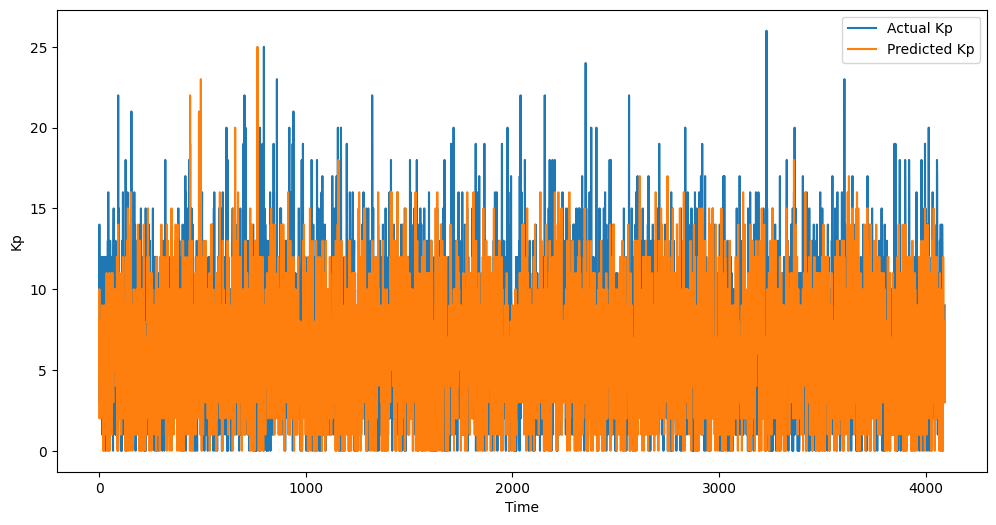

In [132]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences =True,  input_shape=(6, 1)))
model.add(LSTM(64))
model.add(Dense(28, activation='softmax'))

# Step 3: Train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 6, 1), y_train, epochs=50, batch_size=16, validation_split=0.1)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, 6, 1), y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Step 5: Plot the predictions
y_pred = model.predict(X_test.reshape(-1, 6, 1))
predicted_labels = np.argmax(y_pred, axis=1)
actual_labels = y_test

# Convert integer labels back to original Kp values
predicted_kp = label_encoder.inverse_transform(predicted_labels)
actual_kp = label_encoder.inverse_transform(actual_labels)

plt.figure(figsize=(12, 6))

plt.plot(actual_kp, label='Actual Kp')
plt.plot(predicted_kp, label='Predicted Kp')
plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()
plt.show()

In [90]:
pd.DataFrame(actual_labels).value_counts

<bound method DataFrame.value_counts of        0
0      8
1      1
2      9
3     10
4      4
...   ..
4085   1
4086   4
4087  15
4088   5
4089   8

[4090 rows x 1 columns]>

In [133]:
predicted_kp, actual_kp

(array([ 6, 10,  2, ...,  3,  8,  3], dtype=int64),
 array([ 4, 14,  3, ...,  5,  3,  9], dtype=int64))

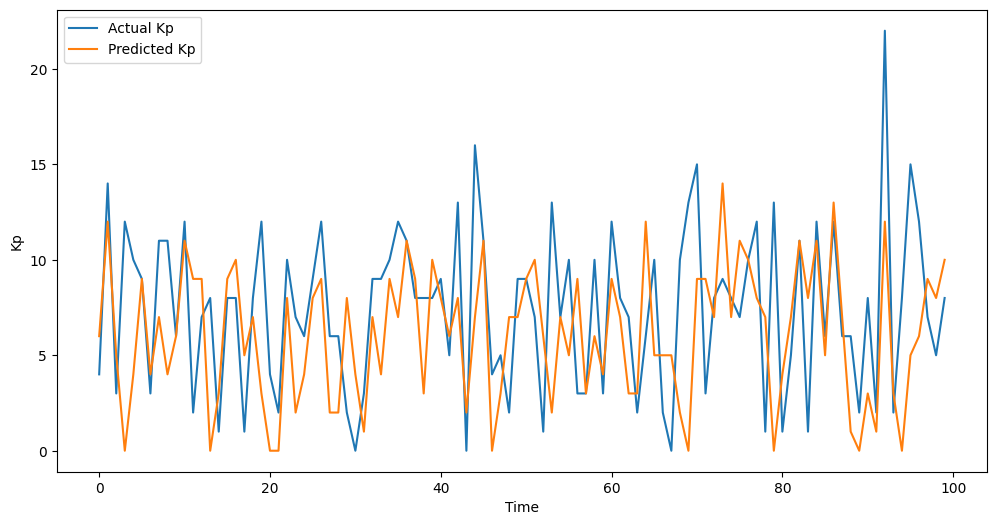

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(actual_kp[:100], label='Actual Kp')
plt.plot(predicted_kp[:100], label='Predicted Kp')

plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()
plt.show()

In [30]:
kp_data = kp_data.reset_index()['Kp_gfz'].values

In [26]:
data = df

In [27]:
kp_data = data['Kp_gfz'].dropna()

In [31]:
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [35]:
df

,Date,YEAR,DOY,HR,"Scalar B, nT","Vector B Magnitude, nT",Lat. Angle of B (GSE),Long. Angle of B (GSE),"BX, nT (GSE, GSM)","BY, nT (GSM)",...,"SW Plasma Speed, km/s_lag_3","SW Plasma Speed, km/s_lag_4","SW Plasma Speed, km/s_lag_5","SW Plasma Speed, km/s_lag_6","Vector B Magnitude, nT_lag_1","Vector B Magnitude, nT_lag_2","Vector B Magnitude, nT_lag_3","Vector B Magnitude, nT_lag_4","Vector B Magnitude, nT_lag_5","Vector B Magnitude, nT_lag_6"
20016,2021-10-20,2021,293.0,0,4.9,2.6,13.6,282.6,0.5,-2.1,...,361.0,382.0,361.0,385.0,0.8,5.9,6.4,5.8,2.2,3.0
20017,2021-10-21,2021,294.0,0,4.5,2.6,3.3,329.5,2.3,-1.1,...,357.0,361.0,382.0,361.0,2.6,0.8,5.9,6.4,5.8,2.2
20018,2021-10-22,2021,295.0,0,3.6,2.3,6.6,301.6,1.2,-1.7,...,379.0,357.0,361.0,382.0,2.6,2.6,0.8,5.9,6.4,5.8
20019,2021-10-23,2021,296.0,0,2.5,1.6,1.1,302.4,0.8,-1.2,...,403.0,379.0,357.0,361.0,2.3,2.6,2.6,0.8,5.9,6.4
20020,2021-10-24,2021,297.0,0,4.2,2.0,-17.9,264.7,-0.2,-1.9,...,514.0,403.0,379.0,357.0,1.6,2.3,2.6,2.6,0.8,5.9
20021,2021-10-25,2021,298.0,0,5.9,4.7,-17.5,284.4,1.1,-4.6,...,459.0,514.0,403.0,379.0,2.0,1.6,2.3,2.6,2.6,0.8
20022,2021-10-26,2021,299.0,0,4.2,2.0,1.3,323.6,1.6,-1.1,...,402.0,459.0,514.0,403.0,4.7,2.0,1.6,2.3,2.6,2.6
20023,2021-10-27,2021,300.0,0,3.5,2.7,9.9,296.6,1.2,-2.1,...,352.0,402.0,459.0,514.0,2.0,4.7,2.0,1.6,2.3,2.6
20024,2021-10-28,2021,301.0,0,2.7,1.9,3.9,278.2,0.3,-1.8,...,333.0,352.0,402.0,459.0,2.7,2.0,4.7,2.0,1.6,2.3
20025,2021-10-29,2021,302.0,0,4.1,2.5,-1.2,294.2,1.0,-2.1,...,339.0,333.0,352.0,402.0,1.9,2.7,2.0,4.7,2.0,1.6


In [32]:
X, y = split_sequence(kp_data, 6)

In [20]:
X

array([[1.   , 1.667, 0.667, 1.667, 0.667, 0.667],
       [1.667, 0.667, 1.667, 0.667, 0.667, 1.333],
       [0.667, 1.667, 0.667, 0.667, 1.333, 0.667],
       [1.667, 0.667, 0.667, 1.333, 0.667, 0.   ],
       [0.667, 0.667, 1.333, 0.667, 0.   , 0.   ],
       [0.667, 1.333, 0.667, 0.   , 0.   , 2.   ],
       [1.333, 0.667, 0.   , 0.   , 2.   , 2.333],
       [0.667, 0.   , 0.   , 2.   , 2.333, 2.333]])

In [21]:
y

array([1.333, 0.667, 0.   , 0.   , 2.   , 2.333, 2.333, 3.333])

In [22]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
()

In [33]:
pd.DataFrame(y).value_counts()

0.000    2
2.333    2
0.667    1
1.333    1
2.000    1
3.333    1
dtype: int64

In [145]:
y.shape

(20456,)

Epoch 1/50
921/921 [==============================] - 13s 10ms/step - loss: 2.7812 - accuracy: 0.0977 - val_loss: 2.7223 - val_accuracy: 0.1197
Epoch 2/50
921/921 [==============================] - 11s 11ms/step - loss: 2.7267 - accuracy: 0.1066 - val_loss: 2.7242 - val_accuracy: 0.0941
Epoch 3/50
921/921 [==============================] - 13s 14ms/step - loss: 2.7209 - accuracy: 0.1097 - val_loss: 2.7192 - val_accuracy: 0.1118
Epoch 4/50
921/921 [==============================] - 9s 10ms/step - loss: 2.7175 - accuracy: 0.1105 - val_loss: 2.7158 - val_accuracy: 0.1148
Epoch 5/50
921/921 [==============================] - 9s 9ms/step - loss: 2.7151 - accuracy: 0.1114 - val_loss: 2.7094 - val_accuracy: 0.1020
Epoch 6/50
921/921 [==============================] - 8s 9ms/step - loss: 2.7124 - accuracy: 0.1122 - val_loss: 2.7147 - val_accuracy: 0.1142
Epoch 7/50
921/921 [==============================] - 8s 9ms/step - loss: 2.7119 - accuracy: 0.1114 - val_loss: 2.7151 - val_accuracy: 0.1087

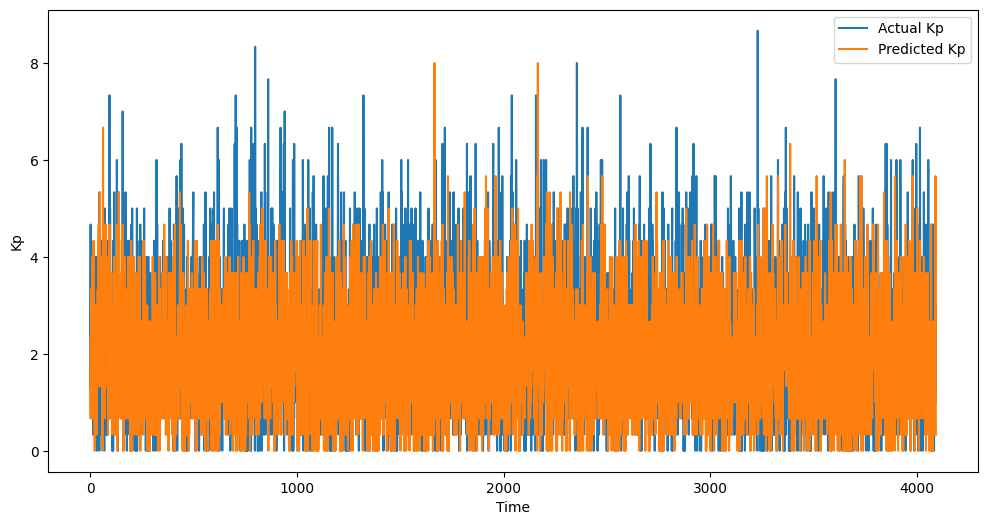

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences =True,  input_shape=(6, 1)))
model.add(LSTM(64))
model.add(Dense(28, activation='softmax'))

# Step 3: Train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 6, 1), y_train, epochs=50, batch_size=16, validation_split=0.1)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, 6, 1), y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Step 5: Plot the predictions
y_pred = model.predict(X_test.reshape(-1, 6, 1))
predicted_labels = np.argmax(y_pred, axis=1)
actual_labels = y_test

# Convert integer labels back to original Kp values
predicted_kp = label_encoder.inverse_transform(predicted_labels)
actual_kp = label_encoder.inverse_transform(actual_labels)

plt.figure(figsize=(12, 6))

plt.plot(actual_kp, label='Actual Kp')
plt.plot(predicted_kp, label='Predicted Kp')
plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()
0plt.show()

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Epoch 1/200
306/306 [==============================] - 11s 26ms/step - loss: 2.8065 - accuracy: 0.0898 - val_loss: 2.6268 - val_accuracy: 0.1288
Epoch 2/200
306/306 [==============================] - 7s 24ms/step - loss: 2.6968 - accuracy: 0.1105 - val_loss: 2.5948 - val_accuracy: 0.1380
Epoch 3/200
306/306 [==============================] - 8s 25ms/step - loss: 2.6764 - accuracy: 0.1158 - val_loss: 2.6006 - val_accuracy: 0.1224
Epoch 4/200
306/306 [==============================] - 8s 25ms/step - loss: 2.6581 - accuracy: 0.1187 - val_loss: 2.5712 - val_accuracy: 0.1233
Epoch 5/200
306/306 [==============================] - 8s 25ms/step - loss: 2.6504 - accuracy: 0.1145 - val_loss: 2.6015 - val_accuracy: 0.1214
Epoch 6/200
306/306 [==============================] - 8s 25ms/step - loss: 2.6335 - accuracy: 0.1221 - val_loss: 2.5581 - val_accuracy: 0.1242
Epoch 7/200
306/306 [==============================] - 7s 24ms/step - loss: 2.6259 - accuracy: 0.1202 - val_loss: 2.5411 - val_accuracy

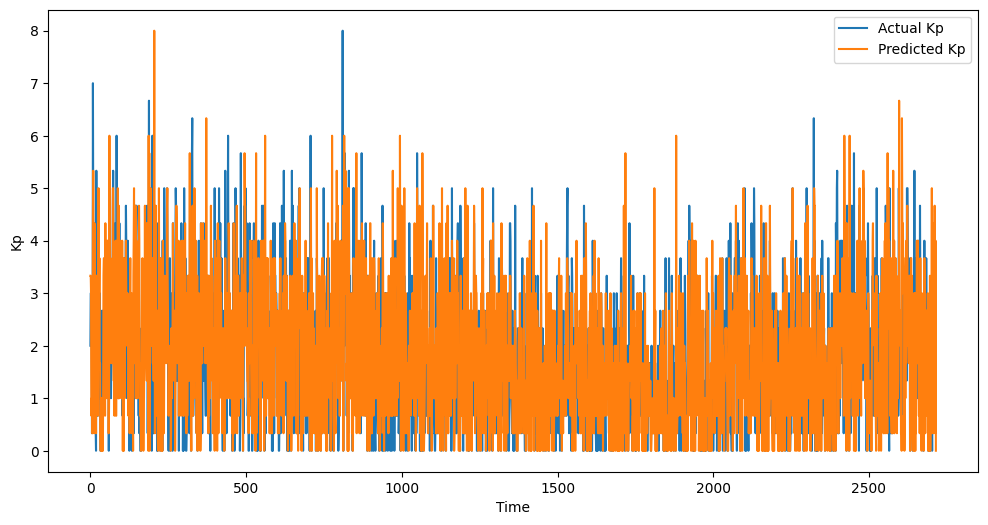

In [51]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


df = pd.read_csv("Data Files/CSV_files/omni_Kp_combined.csv")
# df = df.loc['2001-01-01':'2003-12-31']
# features = df2.loc['2001-01-01':'2003-12-31']
# #  = df.drop(columns=['Kp_gfz'])
# target = df2.loc['2001-01-01':'2003-12-31'][['Kp_gfz']]


# Function to create lagged columns for a given column up to 'n_lags' timesteps
def create_lagged_columns(data, column, n_lags):
    for i in range(1, n_lags + 1):
        data[f'{column}_lag_{i}'] = data[column].shift(i)
    return data

# Create lagged columns for each specified column up to 6 timesteps
columns_to_lag = ['Kp_gfz', 'SW Proton Density, N/cm^3', 'SW Plasma Speed, km/s', 'Vector B Magnitude, nT']
n_lags = 6
for column in columns_to_lag:
    df = create_lagged_columns(df, column, n_lags)

# Drop rows with NaN values resulting from the lagged columns
df.dropna(inplace=True)

# Define the target column ('Kp_gfz') as the label
labels = df['Kp_gfz'].values
df.dropna(inplace = True)

# Select the lagged columns and other features as inputs
lagged_columns = [f'{column}_lag_{i}' for column in columns_to_lag for i in range(1, n_lags + 1)]
features = df[lagged_columns].values

# Normalize the input features using MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# features_normalized = scaler.fit_transform(features)

# Split the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=False)

# label_encoder = LabelEncoder()
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)



model = Sequential()
model.add(LSTM(128, return_sequences =True,  input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64))
model.add(Dense(28, activation='softmax'))

# Step 3: Train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=200, batch_size=32, validation_split=0.1)

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Step 5: Plot the predictions
y_pred = model.predict(X_test.reshape(-1, X_test.shape[1], 1))
predicted_labels = np.argmax(y_pred, axis=1)
actual_labels = y_test

# Convert integer labels back to original Kp values
predicted_kp = label_encoder.inverse_transform(predicted_labels)
actual_kp = label_encoder.inverse_transform(actual_labels)

plt.figure(figsize=(12, 6))

plt.plot(actual_kp, label='Actual Kp')
plt.plot(predicted_kp, label='Predicted Kp')
plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()



In [50]:
X_train.shape

(10863, 24)

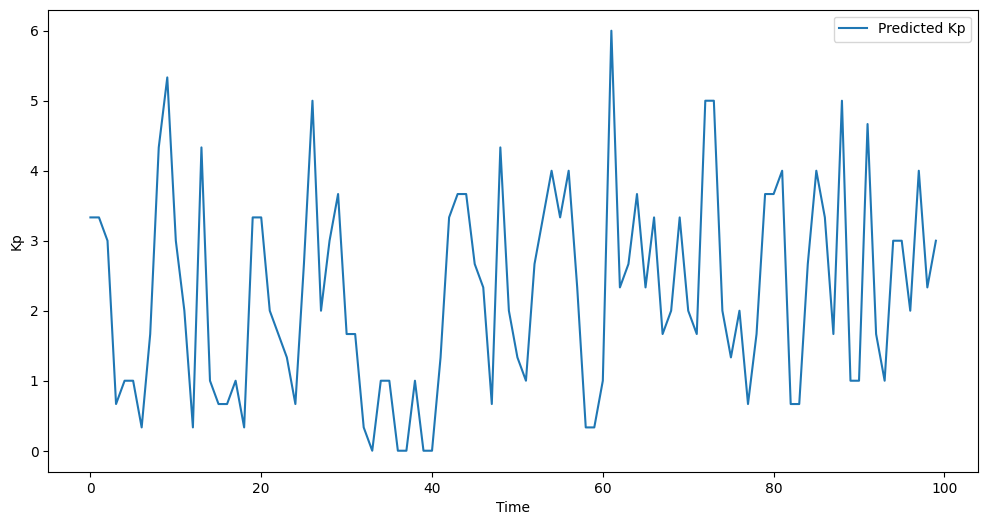

In [53]:
plt.figure(figsize=(12, 6))
# plt.plot(actual_kp[:100], label='Actual Kp')
plt.plot(predicted_kp[:100], label='Predicted Kp')

plt.xlabel('Time')
plt.ylabel('Kp')
plt.legend()
plt.show()

In [54]:
model.save("Models/kp_VBD.h5")

In [45]:
y_test

array([ 7,  7, 10], dtype=int64)

In [41]:
from sklearn.preprocessing  import LabelEncoder
df = pd.read_csv("Data Files/CSV_files/omni_Kp_combined.csv")
df.Date = pd.to_datetime(df.Date)
kp_data = df['Kp_gfz'].values

label_encoder = LabelEncoder()
kp_data = label_encoder.fit_transform(kp_data)
pd.DataFrame(kp_data).value_counts()

6     1771
5     1686
7     1631
8     1603
2     1598
9     1584
4     1556
3     1492
1     1300
10    1293
0     1184
11     965
12     816
13     611
14     424
15     305
16     188
17     141
18     117
19      51
20      49
21      28
22      24
23      17
24      12
25       8
26       5
27       3
28       2
dtype: int64